<center>
<h1> 1 Day Machine Learning Project </h1>
    <br>
    <h2> Fraudulent Transaction Detection</h2> 
    <br>
        <h3> <font size='3'>
        Saud Alkoheji
            <br>
        Pouria Ahadi
            <br>
        Pasha
            <br>
        Lydia Hao
        <br></font> </h3>
    <body> <font size = '1'> This is a project done by WeCloudData students as part of the requirements to pass "Data Science Diploma Program"</font></body>
</center>

# Objective

- Notes
    - One of the most prominent use cases of anomaly detection. Nowadays, it is common to hear about events where one’s credit card number and related information get compromised. This can, in turn, lead to abnormal behavior in the usage pattern of the credit cards. Therefore, to effectively detect these frauds, anomaly detection techniques should be used along with normal ML algorithms.


# Part 1

## Approach:

### 1. Problem definition

- Build a model that predicts whether a given transaction is fraudulent

### 2. Data

- Formatting Notes: Files are in CSV format with headers. Columns x0-x99 are features and y is a label for whether the transaction was fraudulent with 0 corresponding to no and 1 corresponding to yes.

- Cleaning:
    - missing data
    - transforming to numeric data

- EDA:
    df.info
    df.describe
    sns.pairplot(df)
    
### Baseline Model

- Random Forest Regression

### 3. Evaluation

- Evaluate the model using the ROC curve.

### 4. Feature Engineering

- PCA
- KMeans
- Imputation and encoding

### 5. Modelling

- split
- scale
- normalize

### 6. Experimentation

- tuning
- different models



# Part 2

## a)Is the area under the ROC curve the most suitable metric? If so why, and if not then how should the model be evaluated?

ROC curves are pretty easy to understand and evaluate once there is a good understanding of confusion matrix and different kinds of errors. ROC-AUC is robust to variable fraud rate.
When using ROC curve, if our problem is highly imbalanced we get a really high accuracy score by simply predicting that all observations belong to the majority class. In general, an AUC of 0.5 suggests no discrimination (i.e., ability to diagnose patients with and without the disease or condition based on the test), 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding.

## b) What is the difference between a metric and a loss function?
The loss function is used to optimize the model. This is the function that will get minimized by the optimizer. A metric is used to judge the performance of the model. This has nothing to do with the optimization process.
A metric is a function that is used to judge the performance of your model.
Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model. Note that you may use any loss function as a metric.
Loss function can be used to optimize the model. An optimizer is used to minimize the loss function.
An accuracy metric is used to calculate the performance of the model, for example, Confusion matrix, etc.
## c) How might your approach in Question 1 change if you had used your desired metric?
Recall

•	ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
•	Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.
•	ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.

Recall = TruePositives / (TruePositives + FalseNegatives)
Recall quantifies what percentage of the actual positives we were able to identify: How sensitive our model was in identifying positives.

## d) How would you decide at which threshold (probability) to block the transaction?
Risk Thresholds can be used by merchants to block certain high-risk transactions. With this service, we determine the risk of each transaction using a number of monitoring elements such as geolocation checks, proxy detection, IP tracking, and Bank Identification Number checks. Based on this evaluation, transactions are assigned a risk score between 0.01 and 100. The risk score represents the percentage of probability that the transaction is fraudulent. For example, a score of 10 represents a 10% possibility that the transaction is fraudulent. A score of 90 represents a 90% possibility the transaction is fraudulent.
If a transaction is assigned a risk score greater than or equal to the threshold set in the decline field, the transaction is not processed. You will receive an email message for transactions with a risk score lower than the decline threshold but greater than or equal to the warn threshold.

### Import Basic Libraries

In [400]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from matplotlib import gridspec
from collections import Counter
from sklearn.cluster  import KMeans
from scikitplot.cluster import plot_elbow_curve
from scikitplot.metrics import plot_silhouette
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster  import KMeans
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline


# Show plots inside Jupyter notebook
%matplotlib inline 


# 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### EDA


- Missing Data:
    - check the portion of missing data of each column
- clean data while exploring

In [2]:
# Import The Data using pandas

df= pd.read_csv('sample.csv', skipinitialspace=True)

In [3]:
# Explore the head of the dataframe
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,-0.247824,6.425853,-6.485658,-8.241462,NaN,0.03%,Tuesday,-9.808905,4.753455,2.537819,-0.536291,10.582444,7.769123,-1.697887,-14.543662,-9.064746,3.097914,16.105795,-0.527987,16.850774,Aug,8.866011,-8.947343,-11.764099,-0.135144,-10.043622,9.003084,Afternoon,0.545730,0.319815,5.283688,-1.813969,-10.587511,2.832491,-5.779934,-1.125690,1.014132,12.892818,-0.413924,-1.733326,-1.874049,-20.956676,-9.320279,-5.523346,-0.476721,7.414683,1.097771,-3.930508,1.793667,False,-0.108686,5.317815,7.680139,0.378207,15.322308,2.698098,-0.947377,$1578.34,-0.397204,0.639113,-8.754873,-6.916508,-1.190582,-21.599539,0.223052,0.413555,-6.429749,-4.042211,-4.273392,-2.336746,3.437676,-0.302739,-11.212003,-0.191432,2.898971,-0.509015,-3.705124,-0.899774,-0.174566,10.123863,3.346385,11.774675,-19.070104,-3.179197,7.447222,-0.142828,-0.174313,4.188225,-6.875916,-4.737715,3.0,0.592543,14.967527,6.691044,-0.275572,2.518542,4.637431,-14.296510,1.898115,-1.225228,0
1,2.623274,-2.808263,5.321746,-2.437653,0.614041,0.02%,Wednesday,10.710053,1.608882,-2.027541,1.861159,1.753257,8.431834,0.874408,-1.370787,-0.881555,-1.450877,-0.907455,-0.501059,-3.401769,Jul,6.224828,7.383295,-5.300655,0.004107,-1.694427,-0.208724,Afternoon,0.425884,-3.205747,11.243571,-6.597609,-11.708908,1.881650,-1.689855,-2.104615,-0.248824,7.849951,-1.491676,6.475691,-2.908938,-13.282330,1.942034,2.077320,-2.637162,-5.633878,1.381782,-12.238118,2.447636,False,0.864534,-3.326266,1.150270,1.574782,10.539249,2.029427,0.852259,$767.76,-2.784815,1.791430,-0.331797,-12.931258,1.298284,12.857426,7.314244,0.207074,5.191261,-5.843547,-7.319364,-3.242608,16.654469,-0.341612,-3.548448,-0.630534,0.961077,0.781818,-4.097560,0.122779,1.669998,1.196346,-0.291941,NaN,-8.484298,2.180695,7.235634,-0.237143,0.035253,-3.913047,0.053519,13.771923,3.0,-1.712788,-3.638637,-2.256492,2.703101,1.760729,2.660614,1.182922,-3.203078,0.711018,0
2,-5.460551,5.997701,-4.614194,-6.035128,-1.986438,-0.0%,Tuesday,-3.364649,-2.493473,1.429913,-5.575753,-18.837094,NaN,0.299400,-8.014701,-5.431408,-3.874378,-16.196780,2.695056,5.488373,Aug,-3.807583,-8.112442,-0.126295,0.118730,-10.497327,9.448406,Evening,-0.173486,1.012276,13.418661,8.336926,-7.643771,-5.922227,11.665460,-0.671621,-1.372860,2.378651,-0.972633,6.526056,-0.174244,-13.335192,7.831208,0.246875,-2.408651,20.515580,-9.411067,-8.975757,3.774929,False,-0.524717,-0.178613,2.267771,0.763876,10.046104,2.754208,-12.782659,$931.06,5.332591,-2.307477,2.147359,-4.126600,1.023348,3.493787,-3.246489,2.706368,4.613876,-1.823511,-13.266499,-5.869207,3.652379,-1.594137,-0.781348,1.018013,-16.034992,-0.280397,-2.674955,-0.249341,0.544997,-2.660499,-4.957915,7.997598,-0.515298,2.511851,-7.402524,0.409300,-0.017652,-1.440168,-7.592382,8.891467,3.0,2.206956,7.292558,10.095556,1.601155,1.710645,-12.519434,-5.261707,2.032666,-6.445528,0
3,1.566307,-0.080517,0.064754,6.063193,-2.253075,0.0%,Thurday,-6.111982,-1.796377,-3.169510,-2.244341,0.987085,1.882256,-2.562021,-5.377914,-1.595858,-1.722889,-11.549868,0.996523,-2.481800,Aug,-7.827422,8.920190,5.905177,0.086742,10.000140,-0.716942,Afternoon,-0.206609,-8.944275,9.018253,6.852376,-7.503221,3.833084,-6.519159,-1.298989,0.014193,-6.194275,-1.335635,4.777587,1.672814,0.216923,-2.506910,-5.057152,-5.327750,4.481869,-0.615874,-0.381125,6.742620,True,1.107303,-1.270029,-1.724655,-0.808112,4.965718,6.978927,-9.957503,$2124.52,-1.465359,-0.476318,6.416891,-7.981302,1.091259,11.326371,4.095663,0.217517,-11.511348,-0.843213,10.908592,2.911122,6.397023,0.047086,-5.493059,-0.420594,2.761448,1.483259,-2.625770,0.001342,-2.239645,5.922466,8.207778,3.152485,7.

#### Find Columns That Are Not Float or Int

In [4]:
df.select_dtypes(include='object').columns

Index(['x5', 'x6', 'x20', 'x27', 'x49', 'x57'], dtype='object')

In [5]:
df.dropna(thresh=1)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,-0.247824,6.425853,-6.485658,-8.241462,NaN,0.03%,Tuesday,-9.808905,4.753455,2.537819,-0.536291,10.582444,7.769123,-1.697887,-14.543662,-9.064746,3.097914,16.105795,-0.527987,16.850774,Aug,8.866011,-8.947343,-11.764099,-0.135144,-10.043622,9.003084,Afternoon,0.545730,0.319815,5.283688,-1.813969,-10.587511,2.832491,-5.779934,-1.125690,1.014132,12.892818,-0.413924,-1.733326,-1.874049,-20.956676,-9.320279,-5.523346,-0.476721,7.414683,1.097771,-3.930508,1.793667,False,-0.108686,5.317815,7.680139,0.378207,15.322308,2.698098,-0.947377,$1578.34,-0.397204,0.639113,-8.754873,-6.916508,-1.190582,-21.599539,0.223052,0.413555,-6.429749,-4.042211,-4.273392,-2.336746,3.437676,-0.302739,-11.212003,-0.191432,2.898971,-0.509015,-3.705124,-0.899774,-0.174566,10.123863,3.346385,11.774675,-19.070104,-3.179197,7.447222,-0.142828,-0.174313,4.188225,-6.875916,-4.737715,3.0,0.592543,14.967527,6.691044,-0.275572,2.518542,4.637431,-14.296510,1.898115,-1.225228,0
1,2.623274,-2.808263,5.321746,-2.437653,0.614041,0.02%,Wednesday,10.710053,1.608882,-2.027541,1.861159,1.753257,8.431834,0.874408,-1.370787,-0.881555,-1.450877,-0.907455,-0.501059,-3.401769,Jul,6.224828,7.383295,-5.300655,0.004107,-1.694427,-0.208724,Afternoon,0.425884,-3.205747,11.243571,-6.597609,-11.708908,1.881650,-1.689855,-2.104615,-0.248824,7.849951,-1.491676,6.475691,-2.908938,-13.282330,1.942034,2.077320,-2.637162,-5.633878,1.381782,-12.238118,2.447636,False,0.864534,-3.326266,1.150270,1.574782,10.539249,2.029427,0.852259,$767.76,-2.784815,1.791430,-0.331797,-12.931258,1.298284,12.857426,7.314244,0.207074,5.191261,-5.843547,-7.319364,-3.242608,16.654469,-0.341612,-3.548448,-0.630534,0.961077,0.781818,-4.097560,0.122779,1.669998,1.196346,-0.291941,NaN,-8.484298,2.180695,7.235634,-0.237143,0.035253,-3.913047,0.053519,13.771923,3.0,-1.712788,-3.638637,-2.256492,2.703101,1.760729,2.660614,1.182922,-3.203078,0.711018,0
2,-5.460551,5.997701,-4.614194,-6.035128,-1.986438,-0.0%,Tuesday,-3.364649,-2.493473,1.429913,-5.575753,-18.837094,NaN,0.299400,-8.014701,-5.431408,-3.874378,-16.196780,2.695056,5.488373,Aug,-3.807583,-8.112442,-0.126295,0.118730,-10.497327,9.448406,Evening,-0.173486,1.012276,13.418661,8.336926,-7.643771,-5.922227,11.665460,-0.671621,-1.372860,2.378651,-0.972633,6.526056,-0.174244,-13.335192,7.831208,0.246875,-2.408651,20.515580,-9.411067,-8.975757,3.774929,False,-0.524717,-0.178613,2.267771,0.763876,10.046104,2.754208,-12.782659,$931.06,5.332591,-2.307477,2.147359,-4.126600,1.023348,3.493787,-3.246489,2.706368,4.613876,-1.823511,-13.266499,-5.869207,3.652379,-1.594137,-0.781348,1.018013,-16.034992,-0.280397,-2.674955,-0.249341,0.544997,-2.660499,-4.957915,7.997598,-0.515298,2.511851,-7.402524,0.409300,-0.017652,-1.440168,-7.592382,8.891467,3.0,2.206956,7.292558,10.095556,1.601155,1.710645,-12.519434,-5.261707,2.032666,-6.445528,0
3,1.566307,-0.080517,0.064754,6.063193,-2.253075,0.0%,Thurday,-6.111982,-1.796377,-3.169510,-2.244341,0.987085,1.882256,-2.562021,-5.377914,-1.595858,-1.722889,-11.549868,0.996523,-2.481800,Aug,-7.827422,8.920190,5.905177,0.086742,10.000140,-0.716942,Afternoon,-0.206609,-8.944275,9.018253,6.852376,-7.503221,3.833084,-6.519159,-1.298989,0.014193,-6.194275,-1.335635,4.777587,1.672814,0.216923,-2.506910,-5.057152,-5.327750,4.481869,-0.615874,-0.381125,6.742620,True,1.107303,-1.270029,-1.724655,-0.808112,4.965718,6.978927,-9.957503,$2124.52,-1.465359,-0.476318,6.416891,-7.981302,1.091259,11.326371,4.095663,0.217517,-11.511348,-0.843213,10.908592,2.911122,6.397023,0.047086,-5.493059,-0.420594,2.761448,1.483259,-2.625770,0.001342,-2.239645,5.922466,8.207778,3.152485,7.

In [6]:
df.replace([np.inf, -np.inf], np.nan)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,-0.247824,6.425853,-6.485658,-8.241462,NaN,0.03%,Tuesday,-9.808905,4.753455,2.537819,-0.536291,10.582444,7.769123,-1.697887,-14.543662,-9.064746,3.097914,16.105795,-0.527987,16.850774,Aug,8.866011,-8.947343,-11.764099,-0.135144,-10.043622,9.003084,Afternoon,0.545730,0.319815,5.283688,-1.813969,-10.587511,2.832491,-5.779934,-1.125690,1.014132,12.892818,-0.413924,-1.733326,-1.874049,-20.956676,-9.320279,-5.523346,-0.476721,7.414683,1.097771,-3.930508,1.793667,False,-0.108686,5.317815,7.680139,0.378207,15.322308,2.698098,-0.947377,$1578.34,-0.397204,0.639113,-8.754873,-6.916508,-1.190582,-21.599539,0.223052,0.413555,-6.429749,-4.042211,-4.273392,-2.336746,3.437676,-0.302739,-11.212003,-0.191432,2.898971,-0.509015,-3.705124,-0.899774,-0.174566,10.123863,3.346385,11.774675,-19.070104,-3.179197,7.447222,-0.142828,-0.174313,4.188225,-6.875916,-4.737715,3.0,0.592543,14.967527,6.691044,-0.275572,2.518542,4.637431,-14.296510,1.898115,-1.225228,0
1,2.623274,-2.808263,5.321746,-2.437653,0.614041,0.02%,Wednesday,10.710053,1.608882,-2.027541,1.861159,1.753257,8.431834,0.874408,-1.370787,-0.881555,-1.450877,-0.907455,-0.501059,-3.401769,Jul,6.224828,7.383295,-5.300655,0.004107,-1.694427,-0.208724,Afternoon,0.425884,-3.205747,11.243571,-6.597609,-11.708908,1.881650,-1.689855,-2.104615,-0.248824,7.849951,-1.491676,6.475691,-2.908938,-13.282330,1.942034,2.077320,-2.637162,-5.633878,1.381782,-12.238118,2.447636,False,0.864534,-3.326266,1.150270,1.574782,10.539249,2.029427,0.852259,$767.76,-2.784815,1.791430,-0.331797,-12.931258,1.298284,12.857426,7.314244,0.207074,5.191261,-5.843547,-7.319364,-3.242608,16.654469,-0.341612,-3.548448,-0.630534,0.961077,0.781818,-4.097560,0.122779,1.669998,1.196346,-0.291941,NaN,-8.484298,2.180695,7.235634,-0.237143,0.035253,-3.913047,0.053519,13.771923,3.0,-1.712788,-3.638637,-2.256492,2.703101,1.760729,2.660614,1.182922,-3.203078,0.711018,0
2,-5.460551,5.997701,-4.614194,-6.035128,-1.986438,-0.0%,Tuesday,-3.364649,-2.493473,1.429913,-5.575753,-18.837094,NaN,0.299400,-8.014701,-5.431408,-3.874378,-16.196780,2.695056,5.488373,Aug,-3.807583,-8.112442,-0.126295,0.118730,-10.497327,9.448406,Evening,-0.173486,1.012276,13.418661,8.336926,-7.643771,-5.922227,11.665460,-0.671621,-1.372860,2.378651,-0.972633,6.526056,-0.174244,-13.335192,7.831208,0.246875,-2.408651,20.515580,-9.411067,-8.975757,3.774929,False,-0.524717,-0.178613,2.267771,0.763876,10.046104,2.754208,-12.782659,$931.06,5.332591,-2.307477,2.147359,-4.126600,1.023348,3.493787,-3.246489,2.706368,4.613876,-1.823511,-13.266499,-5.869207,3.652379,-1.594137,-0.781348,1.018013,-16.034992,-0.280397,-2.674955,-0.249341,0.544997,-2.660499,-4.957915,7.997598,-0.515298,2.511851,-7.402524,0.409300,-0.017652,-1.440168,-7.592382,8.891467,3.0,2.206956,7.292558,10.095556,1.601155,1.710645,-12.519434,-5.261707,2.032666,-6.445528,0
3,1.566307,-0.080517,0.064754,6.063193,-2.253075,0.0%,Thurday,-6.111982,-1.796377,-3.169510,-2.244341,0.987085,1.882256,-2.562021,-5.377914,-1.595858,-1.722889,-11.549868,0.996523,-2.481800,Aug,-7.827422,8.920190,5.905177,0.086742,10.000140,-0.716942,Afternoon,-0.206609,-8.944275,9.018253,6.852376,-7.503221,3.833084,-6.519159,-1.298989,0.014193,-6.194275,-1.335635,4.777587,1.672814,0.216923,-2.506910,-5.057152,-5.327750,4.481869,-0.615874,-0.381125,6.742620,True,1.107303,-1.270029,-1.724655,-0.808112,4.965718,6.978927,-9.957503,$2124.52,-1.465359,-0.476318,6.416891,-7.981302,1.091259,11.326371,4.095663,0.217517,-11.511348,-0.843213,10.908592,2.911122,6.397023,0.047086,-5.493059,-0.420594,2.761448,1.483259,-2.625770,0.001342,-2.239645,5.922466,8.207778,3.152485,7.

In [7]:
df[['x5', 'x6', 'x20', 'x27', 'x49', 'x57']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x5      7906 non-null   object
 1   x6      7909 non-null   object
 2   x20     7900 non-null   object
 3   x27     7920 non-null   object
 4   x49     7908 non-null   object
 5   x57     7915 non-null   object
dtypes: object(6)
memory usage: 375.1+ KB


### From the object columns, we can see the following:

- x5: Percentage
    - This column's values can be converted to numeric by removing the percentage (%) sign.
    - we can also convert it to categorical column because it consists of 10 unique values only.

- x6: days of the week
    - This is a categorical column and can be converted to numeric.

- x27: time of the day
    - This is a categorical column and can be converted to numeric.

- x49: False and True values
    - This is a categorical column and can be converted to numeric.
    
- x57: Amount in Dollars
    - This column's values can be converted to numeric by removing the Dollar ($) sign.

#### Preprocessing Object Colunms That Can Be Converted To Numeric

In [8]:
# ['x5'] Remove the '%' sign:

df['x5'] = df['x5'].str.replace('%','')

df['x5']=df['x5'].astype(float)

# ['x57'] Remove the '$' sign:

df['x57'] = df['x57'].str.replace('$','')

df['x57']=df['x57'].astype(float)

0       0.03
1       0.02
2      -0.00
3       0.00
4       0.00
        ... 
7995    0.01
7996    0.00
7997   -0.01
7998   -0.00
7999   -0.02
Name: x5, Length: 8000, dtype: float64

#### Check the Missing Data

In [13]:
# Count missing data in each column
missing= pd.DataFrame(df.isnull().sum(axis=0),columns=['missing_count'])
missing.sort_values(by=['missing_count'],ascending=False)

,missing_count
x20,100
x78,98
x75,97
x86,97
x16,97
x93,97
x84,95
x60,94
x5,94
x92,93


In [14]:
# Count missing data in each row
df[df.isnull().sum(axis=1) > 1]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,y


#### More EDA

- Find Outliers

- Given the fact that we don't have feature names, we will use a pivot table to see all columns

C:\Users\samad\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


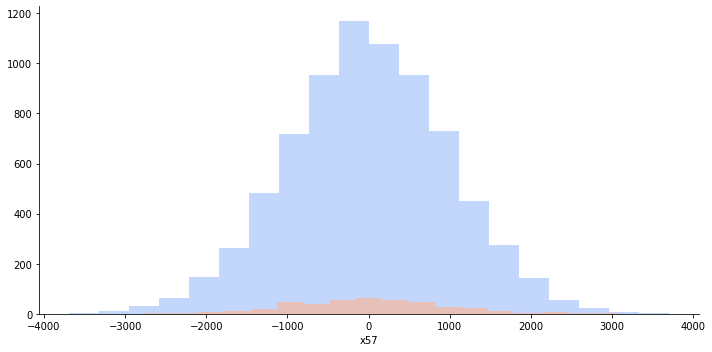

In [28]:
g = sns.FacetGrid(df,hue="y",palette='coolwarm',size=5,aspect=2)
g = g.map(plt.hist,'x57',bins=20,alpha=0.7)

In [15]:
count_pivot=pd.pivot_table(df,index='y',aggfunc=pd.Series.count).T
count_pivot.columns=['count_no_fraud','count_fraud']

mean_pivot=pd.pivot_table(df,index='y',aggfunc=pd.Series.min).T
mean_pivot.columns=['mean_no_fraud','mean_fraud']

min_pivot=pd.pivot_table(df,index='y',aggfunc=pd.Series.min).T
min_pivot.columns=['min_no_fraud','min_fraud']

max_pivot= pd.pivot_table(df,index='y',aggfunc=pd.Series.max).T
max_pivot.columns=['max_no_fraud','max_fraud']

pivot_tables =  count_pivot.join(mean_pivot)
pivot_tables =  pivot_tables.join(min_pivot)
pivot_tables =  pivot_tables.join(max_pivot)
pivot_tables

,count_no_fraud,count_fraud,mean_no_fraud,mean_fraud,min_no_fraud,min_fraud,max_no_fraud,max_fraud
x0,7484.0,432.0,-18.2523,-11.2586,-18.2523,-11.2586,16.4643,11.1808
x1,7487.0,437.0,-42.4598,-29.0733,-42.4598,-29.0733,58.0378,35.9989
x10,7474.0,437.0,-23.4122,-17.3419,-23.4122,-17.3419,20.7084,14.8567
x11,7492.0,433.0,-36.4958,-27.7845,-36.4958,-27.7845,34.3896,27.7719
x12,7478.0,438.0,-44.382,-21.035,-44.382,-21.035,38.3911,30.8591
x13,7494.0,435.0,-5.07777,-4.09112,-5.07777,-4.09112,4.78395,3.89046
x14,7474.0,435.0,-23.6317,-14.5841,-23.6317,-14.5841,22.7731,15.1792
x15,7474.0,435.0,-19.5879,-15.6844,-19.5879,-15.6844,20.0491,14.5941
x16,7467.0,436.0,-11.3864,-9.20338,-11.3864,-9.20338,10.0937,7.30654
x17,7486.0,435.0,-27.1081,-23.5029,-27.1081,-23.5029,28.6352,24.4655


#### Find Abnormal Correlations

In [16]:
df.corr().iloc[-1:][df.corr() > .1]

,x0,x1,x2,x3,x4,x5,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x21,x22,x23,x24,x25,x26,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
y,NaN,0.114717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.145304,NaN,NaN,NaN,NaN,NaN,0.135552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.146589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


#### Count Values In Each Column To Find Categorical Data

In [20]:
num_values_columns= pd.DataFrame(num_values_columns,
             columns=['column','value_count'])
num_values_columns.set_index('column', inplace=True)
num_values_columns[num_values_columns['value_count']<50]

,value_count
column,
x5,10
x6,6
x20,13
x27,5
x49,3
x90,6
y,2


#### Handling Missing Values And Categorical Columns

In [21]:
# create a temporary table to get the categorical columns and drop the missing values from them using pandas get_dummies function
new=df[['x6', 'x20', 'x27', 'x49', 'x90']]
new=pd.get_dummies(new,dummy_na=False,drop_first=True)

# drop the categorical columns and join the new columns from the temporary table
df.drop(['x6', 'x20', 'x27', 'x49', 'x90'],axis=1,inplace=True)
        
df=df.join(new)

#numeric imputer to fill in missing values with the mean of the column
NSI= SimpleImputer(strategy='mean',missing_values=np.nan)
df= pd.DataFrame(NSI.fit_transform(df),columns=df.columns)

# check if there are any duplicates
df.drop_duplicates(subset=None, keep='first', inplace=False)

,x90,x6_Monday,x6_Thurday,x6_Tuesday,x6_Wednesday,x20_Aug,x20_Dec,x20_Feb,x20_Jan,x20_Jul,x20_Jun,x20_Mar,x20_May,x20_Nov,x20_Oct,x20_Sept,x27_Evening,x27_Morning,x27_Night,x49_True
0,3.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,3.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,3.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7996,4.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7997,3.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7998,4.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


#### Find Number of Each Class (Fraud-NonFraud)

In [27]:
df['y'].value_counts(dropna=False)

0.0    7561
1.0     439
Name: y, dtype: int64

C:\Users\samad\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\samad\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\samad\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\samad\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\samad\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\samad\Anaconda3\lib\site-packages\statsmodels\no

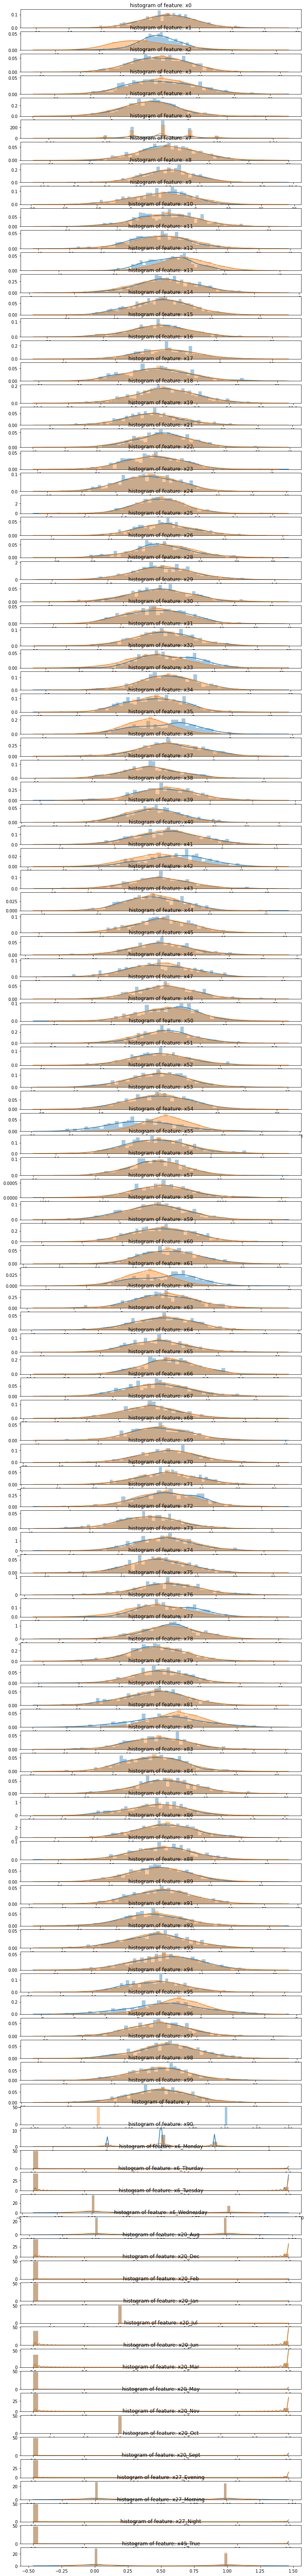

In [29]:
# distribution of anomalous features
features = df.iloc[:,0:116].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(116, 1)
for i, c in enumerate(df.columns):
 ax = plt.subplot(gs[i])
 sns.distplot(df[c][df.y == 1], bins=50)
 sns.distplot(df[c][df.y == 0], bins=50)
 ax.set_xlabel('')
 ax.set_title('histogram of feature: ' + str(c))
plt.show()

# Separating Features & Labels

In [241]:
X=df.drop('y',axis=1)
y=df['y']

#Get the shape of X and y
X.shape, y.shape, Counter(y)

In [202]:
# Percentage of fraudulent cases from the total transactions
print(round(Counter(y)[1]/len(df['y'])*100,2),'%')

5.49 %


### There is only 5.49 % fraudulent transaction out of all the transactions. 
- The data is highly Unbalanced.

# Feature engineering

- KMeans clusterring is used to create new features. However, using Decision Tree Classifier, the new colunm seemed to have no importance.
- The baseline model scores were negatively affected, thus, it was dropped from the features used in the final model

### KMeans Clusters Column

In [181]:
df1=df.copy()
X=df1.drop('y',axis=1)
y=df1['y']


kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

predictions2 = kmeans.predict(X)

df1['kmean_cluster']= predictions2

# New X and y
X=df1.drop('y',axis=1)
y=df1['y']

In [182]:
X.shape

(8000, 116)

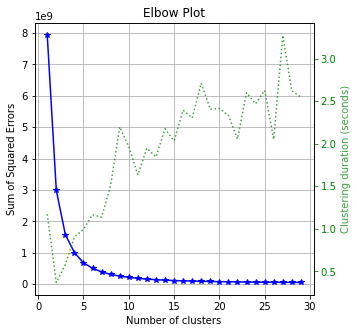

In [168]:
plot_elbow_curve(kmeans, X, cluster_ranges=range(1, 30), figsize=(5, 5));

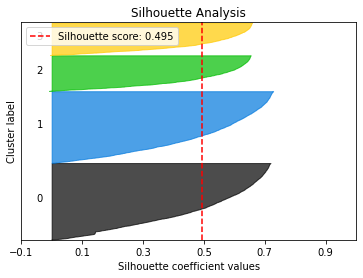

In [183]:
np.random.seed(42)

model = KMeans(4)
model.fit(X)

plot_silhouette(X, model.labels_);


### DTree Features write up

In [251]:
X = X[top_dtree_features]

# Preprocessing Final Step
    
- Split the data into training and testing sets
- Normalize the data
- Balance the Data 

In [252]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [253]:
# Handling imbalance in Data:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

# Normalizing the Data using Standard Scaler:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns) 

C:\Users\samad\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [254]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((12080, 60), (1600, 60), (12080,), (1600,))

## Baseline Model

In [255]:
RFC= RandomForestClassifier(max_depth= None,
                                              min_samples_leaf= 4,
                                              min_samples_split= 2,
                                              n_estimators= 1000   )

# Fit the model on the training data 
#(note: when fit() is called with a Pipeline(), fit_transform() is used for transformers)
RFC.fit(X_train, y_train)

# Score the model on the data 
# (note: when score() or  predict() is called with a Pipeline(), transform() is used for transformers)
RFC.score(X_test, y_test)


y_pred = RFC.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1521
         1.0       0.67      0.43      0.52        79

    accuracy                           0.96      1600
   macro avg       0.82      0.71      0.75      1600
weighted avg       0.96      0.96      0.96      1600



### Feature Selection

In [247]:
# Decision Tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Use val set to tune hyperparameters/pick ML algo

d_tree = DecisionTreeClassifier(max_depth=100, criterion='entropy', min_samples_split=4,
                                random_state=42).fit(X_train,y_train)

y_pred = d_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1891
         1.0       0.50      0.56      0.53       109

    accuracy                           0.94      2000
   macro avg       0.74      0.76      0.75      2000
weighted avg       0.95      0.94      0.95      2000



In [248]:
# Extracting Top 20 Features
top_dtree_features = list(pd.Series(data=d_tree.feature_importances_,index=X.columns).sort_values(ascending=False)[:60].index)

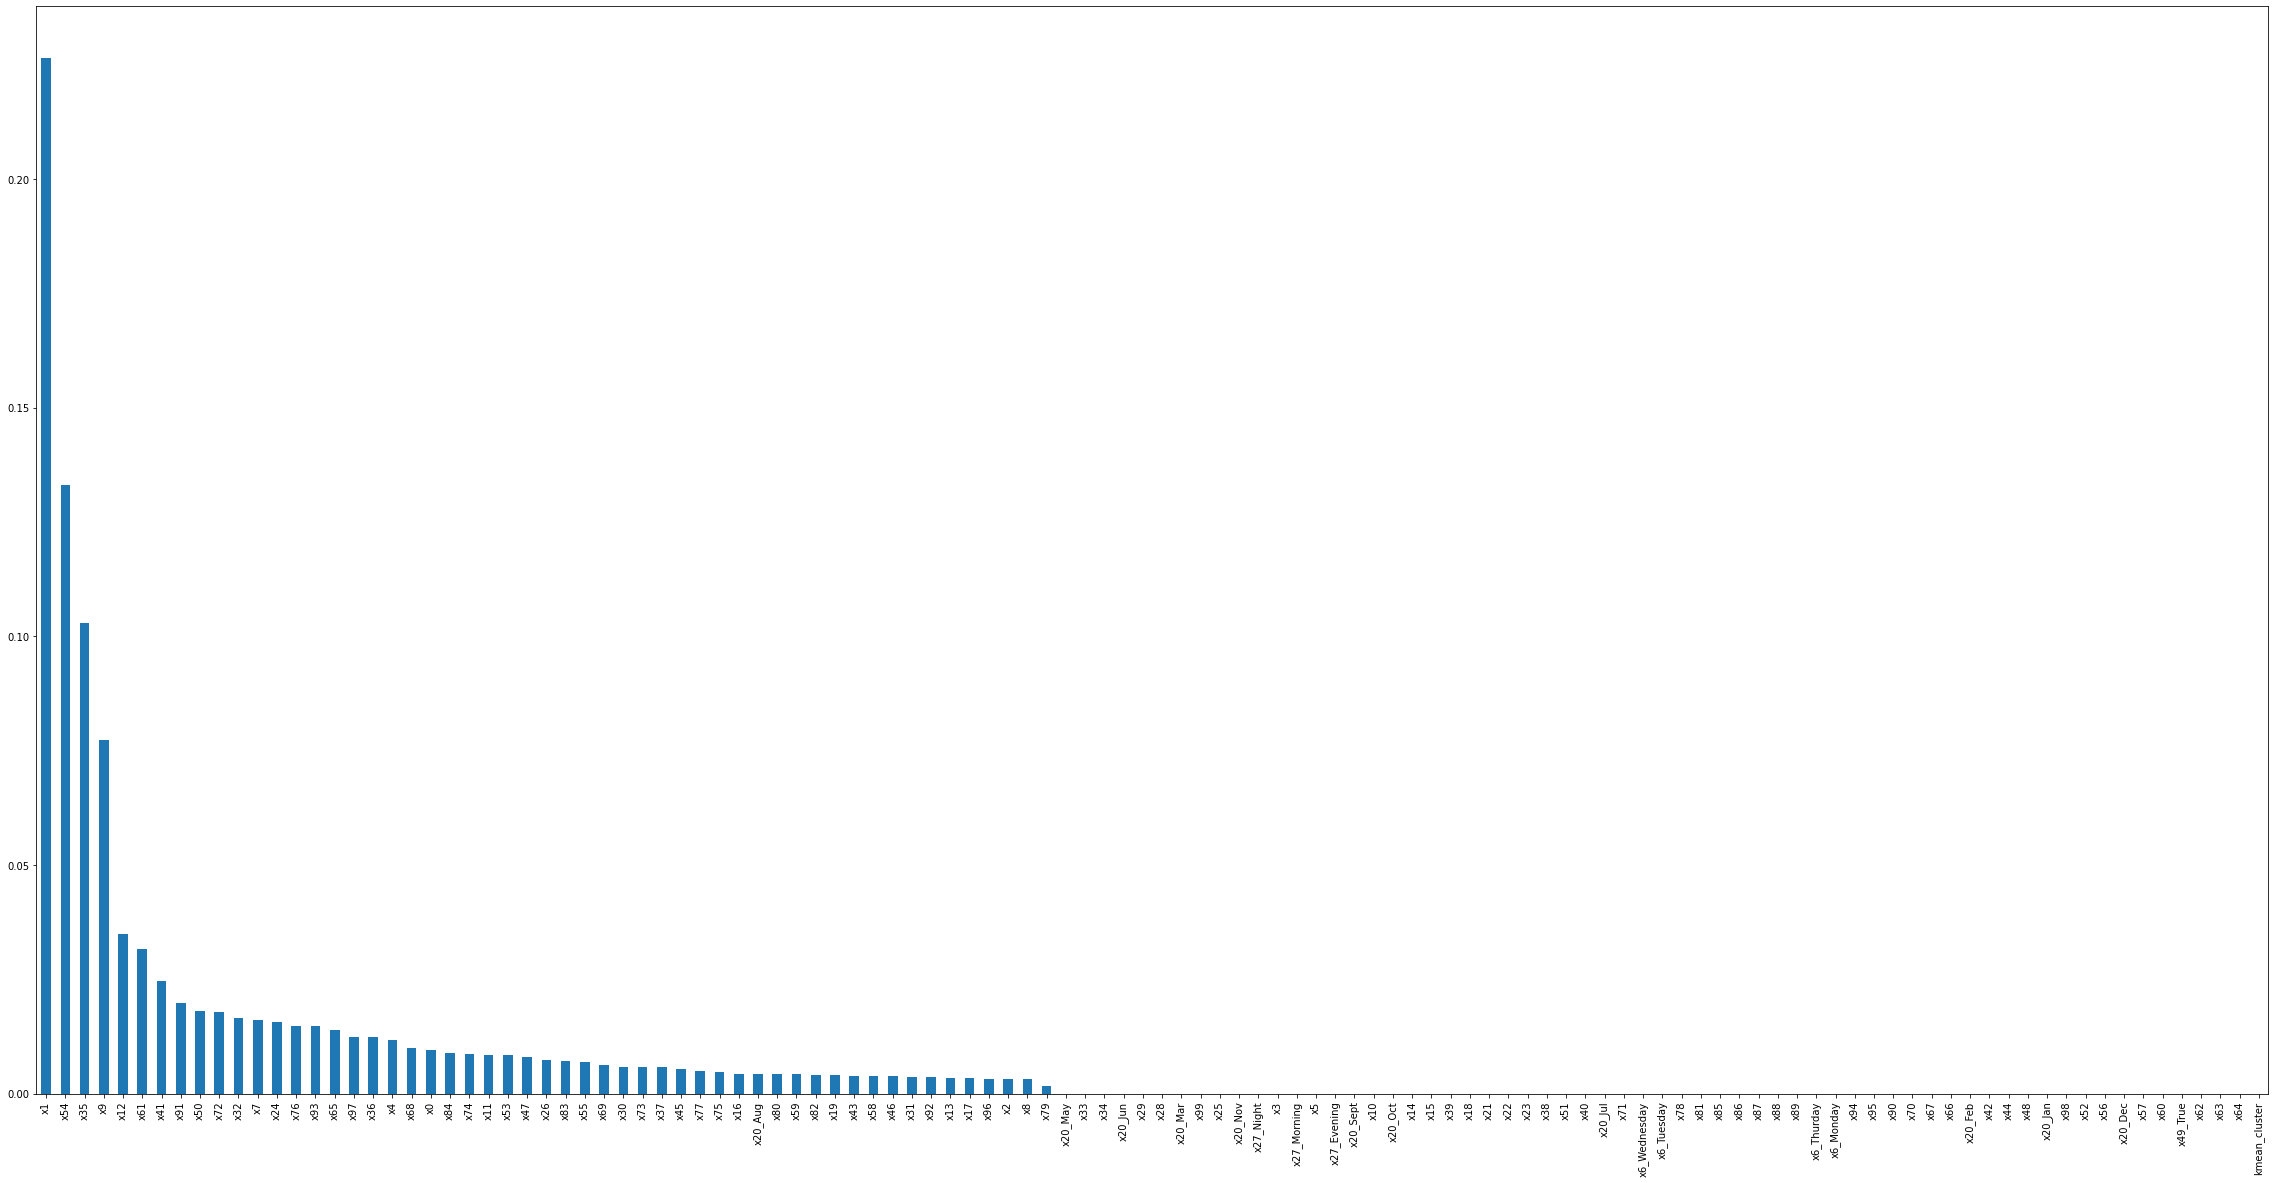

In [249]:
pd.Series(data=d_tree.feature_importances_,index=X.columns).sort_values(ascending=False).plot(kind='bar', figsize=(40,20))

In [250]:
# Top 20 Decision Tree Features
top_dtree_features

['x1',
 'x54',
 'x35',
 'x9',
 'x12',
 'x61',
 'x41',
 'x91',
 'x50',
 'x72',
 'x32',
 'x7',
 'x24',
 'x76',
 'x93',
 'x65',
 'x97',
 'x36',
 'x4',
 'x68',
 'x0',
 'x84',
 'x74',
 'x11',
 'x53',
 'x47',
 'x26',
 'x83',
 'x55',
 'x69',
 'x30',
 'x73',
 'x37',
 'x45',
 'x77',
 'x75',
 'x16',
 'x20_Aug',
 'x80',
 'x59',
 'x82',
 'x19',
 'x43',
 'x58',
 'x46',
 'x31',
 'x92',
 'x13',
 'x17',
 'x96',
 'x2',
 'x8',
 'x79',
 'x20_May',
 'x33',
 'x34',
 'x20_Jun',
 'x29',
 'x28',
 'x20_Mar']

In [220]:
# Get feature importance to cross check the features that are removed with the important features from decision tree

perm = PermutationImportance(RFC, random_state=42)

perm.fit(X_train, y_train)

eli5.show_weights(perm, feature_names=X_train.columns.tolist(),top=20)

Weight,Feature
0.0047 ± 0.0028,x1
0.0033 ± 0.0013,x9
0.0026 ± 0.0022,x61
0.0022 ± 0.0006,x32
0.0015 ± 0.0007,x82
0.0014 ± 0.0006,x4
0.0012 ± 0.0011,x69
0.0010 ± 0.0006,x8
0.0010 ± 0.0007,x79
0.0009 ± 0.0006,x19


# Hyperparameters Tuning

In [ ]:
rfc_param_grid = {"n_estimators": np.arange(100,500,100),
           "max_depth": [None, 5, 10],
           "min_samples_split": np.arange(2, 10, 3),
           "min_samples_leaf": np.arange(4, 10, 3)}

In [ ]:
RFC.fit(X_train, y_train)

# Setup random hyperparameter search for RandomForestClassifier
rfc_grid = GridSearchCV(RandomForestClassifier(),
                           rfc_param_grid,
                            scoring='f1',
                           cv=5,
                           verbose=True,
                           n_jobs= -1)

# Fit random hyperparameter search model
rfc_grid.fit(X_train, y_train);

In [ ]:
predictions = rfc_grid.predict(X_test)

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

# ROC Curve

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.912


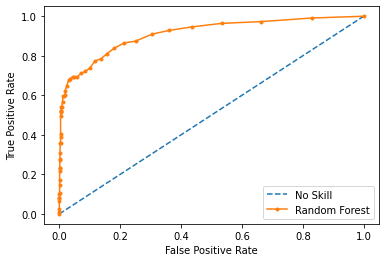

In [258]:
# roc curve and auc
# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = RandomForestClassifier()
model.fit(X_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_roc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_roc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Random Forest: f1=0.313 auc=0.655


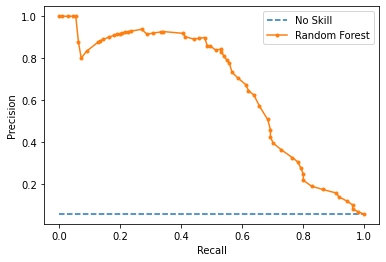

In [257]:
# precision-recall curve and f1
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.25, random_state=2)
# fit a model
model = RandomForestClassifier()
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positloive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Random Forest: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Random Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# KMeans

- Standard scaling is used to normalize the data and then PCA is used to change the dimensions of the data in order to be able to plot it as clusters

In [259]:
# Oversampling is not needed in the case of clustering
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [260]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns) 

In [261]:
# Choose features that explains 95% of variance (run 1 times)
pca=PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#print(pca.components_) 

kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train)
predictions = kmeans.predict(X_test)

In [262]:
X_train.shape , X_test.shape, X.shape

((6400, 52), (1600, 52), (8000, 60))

In [263]:
predictions = kmeans.predict(X_test)

pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y_test == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))

pred_good = np.where(predictions == 0)[0]
real_good = np.where(y_test == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))

false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X_test) - (false_neg + false_pos)) / len(X_test)
print("Accuracy:", accuracy)
print("False negative rate (with respect to misclassifications): ", false_neg_rate)
print("False negative rate (with respect to all the data): ", false_neg / len(predictions))
print("False negatives, false positives, mispredictions:", false_neg, false_pos, false_neg + false_pos)
print("Total test data points:", len(X_test))

Accuracy: 0.6775
False negative rate (with respect to misclassifications):  0.003875968992248062
False negative rate (with respect to all the data):  0.00125
False negatives, false positives, mispredictions: 2 514 516
Total test data points: 1600


In [264]:
predictions.shape

(1600,)

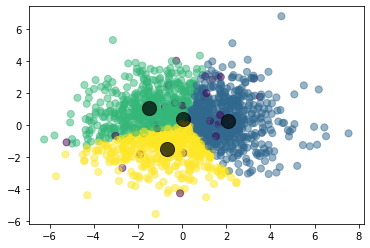

In [266]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, s=50, cmap='viridis', alpha=0.5)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7);

## Isolation Forest Classifier To Find Outliers

- Outlier detection using sklearn isolation forest
    A list of all outliers and their labels are fraudulent or not

In [379]:
np.random.seed(42)
iso = IsolationForest(contamination=0.11)
# the proportion of outliers in the data set
y_predict = iso.fit_predict(X_train)

outliers = y_predict == -1

In [380]:
X_train1, y_train1 = X_train[outliers], y_train[outliers]

X_train1.shape , y_train1.shape

In [388]:
outlier_t = pd.DataFrame(X_train1)

outlier_t['label'] = y_train1

outlier_t.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,label
0,-3.773269,0.730452,1.660821,0.383540,0.041934,2.095872,-1.880252,-0.859716,-0.564476,-0.471079,-0.485312,-0.272447,0.775830,-2.310836,0.816689,0.757172,-1.511544,-2.164932,-2.090660,2.372329,-0.751482,-1.251799,1.018982,2.080418,0.950726,0.208686,-0.311702,-1.392256,-1.616503,-0.691049,0.690641,1.132197,-0.341195,-1.016600,-1.638574,-0.348290,1.992595,-1.003215,-0.550543,-0.153569,-1.103822,0.932825,-0.182806,-2.597683,0.303792,-0.295823,0.200744,2.416252,-0.388414,2.123079,0.466690,-0.403778,NaN
1,-1.820545,1.064817,-2.608475,0.047550,-0.321896,0.220779,0.981148,-0.021248,-0.157350,-0.768396,-1.865542,1.440724,3.050684,3.110202,-1.623207,-1.397457,-1.352422,-1.197776,-1.570844,-0.101282,-0.115259,0.123913,0.127048,0.532052,1.354178,-0.949963,-0.504192,-0.627842,-1.644820,-0.293085,1.243353,-0.034784,0.758685,-1.425241,-0.050173,-1.217959,-1.430622,0.096318,0.559316,2.360241,0.419119,-0.198612,-1.378994,-1.573505,0.447466,-0.522815,0.026601,-0.255735,-0.380346,0.851043,-1.045446,-0.627123,NaN
2,1.055953,-3.430918,-1.580654,-0.331127,-0.036007,-0.369422,0.929622,2.086860,0.035410,1.828559,0.551651,0.059206,-1.330512,-0.237091,0.361039,-1.639438,0.842985,-2.095540,-0.264242,-1.120142,0.730810,-2.177993,0.137396,0.670311,0.095739,1.478721,0.727744,-0.489308,1.192635,-0.504012,-0.832628,1.933234,1.975714,0.101579,-0.331735,-0.577788,0.089901,-1.751940,0.208107,0.548728,0.444474,-0.127757,-0.242553,-0.683993,1.830629,1.400155,-0.575870,1.758242,0.955107,-0.211964,0.018988,-0.438215,0.0
3,-3.318434,-3.038861,4.665945,-1.595438,-2.199054,-0.446743,0.091660,0.331219,0.408665,1.282212,-1.004835,-0.700511,0.057012,0.192521,-1.175093,-0.045188,-0.214167,-0.738466,-1.412500,-0.730635,-0.296330,2.388095,-0.486587,-0.331307,0.165766,-1.203822,0.568471,2.272447,0.903361,1.482595,0.360108,-1.759481,-0.313941,-1.077926,-0.588337,-1.539156,0.157616,-0.980499,-0.421139,0.403699,0.764533,-0.454907,-3.112271,0.452614,-0.294272,1.369408,-0.296652,-0.332709,0.123464,-1.061155,0.606303,-0.159981,NaN
4,-3.221135,0.580337,0.354500,-1.179227,-1.613613,-2.277031,1.579449,-0.432712,-0.200765,0.470344,0.941931,-0.058891,0.689516,-1.552095,1.978690,1.452876,1.476743,0.220754,2.544803,0.130561,1.043516,-0.410305,1.799856,-0.380362,0.727916,-0.164351,0.803583,2.156972,0.047053,-0.272130,-0.563403,-1.517756,0.866619,0.448985,-0.596761,-0.148311,0.279126,0.663122,0.767609,-1.288669,1.428505,-1.184663,-0.466739,-0.412146,-1.266399,-0.322175,1.240801,-0.488927,-0.465944,0.047595,-1.030203,-0.709245,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,2.021347,-2.014521,1.489484,-1.268560,3.270536,0.380036,-0.033996,-1.252717,-0.194337,-0.045781,-1.130128,0.649431,-0.344292,-0.332566,-0.681698,0.650999,-1.088618,0.106407,2.477134,1.573314,-2.081970,-0.118391,0.117575,1.770789,1.124403,-0.656329,-0.379941,-0.324826,-0.552660,-2.033896,0.912340,-0.578786,-0.753076,0.755900,1.856457,-0.613721,0.726178,-1.461343,1.032643,1.324755,-0.073322,-0.680627,-0.224452,-1.146947,-0.635487,-1.753023,2.145870,-0.814451,1.568397,-1.155620,2.180880,-0.180784,NaN
700,1.074526,0.685316,1.230036,-0.307514,2.471464,-1.129055,-1.388967,0.701172,2.519708,0.861391,0.535568,0.399988,1.187974,-3.148182,1.515095,-0.322254,1.151643,-1.299522,1.379001,-0.652383,0.550434,-1.283052,1.001636,-1.607142,-0.445110,-1.663275,1.416302,0.867884,-2.019801,-0.434478,-0.650673,0.478714,1.511580,1.540076,0.015395,0.664808,-0.325467,-1.595485,0.590474,-1.042435,1.951751,0.868858,0.986313,1.820580,0.411407,-1.001689,-0.161457,-0.878042,1.276825,0.900648,-0.410048,-0.927944,NaN
701,1.384338,-1.327127,-2.329125,-0.803736,1.972105,-0.291429,-0.957564,-1.048670,0.063117,0.982382,1.476872,0.46

# Stacking And Voting

- After experimenting with the data and trying different parameters, we find that the best score is obtained usind the stacking method.
- These methods are more accurate, however, they are time consuming and might not be best if needed for fast detection.
- The management can decide what to use based on their capabilities and computing power

In [396]:
estimators = [

    ("SVC", SVC()),
    #('Decision Tree', DecisionTreeClassifier()),
    ("Logistic Regression", LogisticRegression(max_iter=10000)),
    ("Random Forest", RandomForestClassifier(max_depth= None,
                                              min_samples_leaf= 4,
                                              min_samples_split= 2,
                                              n_estimators= 1000   ) )]

stack1 = StackingClassifier(
    estimators=estimators, final_estimator=RandomForestClassifier() )

stack2 = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression() )

print('Random Forest estimator "Accuracy"= {}%'.format(round(cross_val_score(stack1, X, y, cv=5, scoring='accuracy').mean(),2)*100))
print('Random Forest estimator "Recall"= {}%'.format(round(cross_val_score(stack1, X, y, cv=5, scoring='f1').mean(),2)*100))
print('Random Forest estimator "Precision"= {}%'.format(round(cross_val_score(stack1, X, y, cv=5, scoring='precision').mean(),2)*100))
print('\n')
print('Logistic Regression estimator "Accuracy"= {}%'.format(round(cross_val_score(stack2, X, y, cv=5, scoring='accuracy').mean(),2)*100))
print('Logistic Regression estimator "Recall"= {}%'.format(round(cross_val_score(stack2, X, y, cv=5, scoring='recall').mean(),2)*100))
print('Logistic Regression estimator "Precision"= {}%'.format(round(cross_val_score(stack2, X, y, cv=5, scoring='precision').mean(),2)*100))

Random Forest estimator "Accuracy"= 96.0%
Random Forest estimator "Recall"= 61.0%
